## Airline Tweets: Sentiment Analysis & Simple Classification

### ISM6564

**Week04, Part02**

&copy; 2023 Dr. Tim Smith

<a target="_blank" href="https://colab.research.google.com/github/prof-tcsmith/ta-f23/blob/main/W04/4.3-Tutorial - Descriptive Analysis - brand sentiment.ipynb#offline=1">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

---

## Introduction

In this notebook we will analysze the sentiment from a dataset on how travelers tweeted about their airline-related feelings, scraped from Twitter in February 2015;.

In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from matplotlib import pyplot as plt

from nltk.tokenize import TweetTokenizer

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from textblob import TextBlob
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# read in the data 
df = pd.read_csv('data/Tweets_1.csv') 
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df.airline_sentiment.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [5]:

df.loc[df.airline_sentiment == 'neutral'  , ["airline_sentiment_confidence"]].sample(20).values

array([[0.6513],
       [1.    ],
       [0.3603],
       [1.    ],
       [0.3498],
       [1.    ],
       [1.    ],
       [1.    ],
       [1.    ],
       [1.    ],
       [1.    ],
       [0.663 ],
       [1.    ],
       [1.    ],
       [1.    ],
       [1.    ],
       [1.    ],
       [1.    ],
       [1.    ],
       [1.    ]])

In [6]:

df.loc[df.airline_sentiment == 'positive'  , ["airline_sentiment_confidence"]].sample(20).values

array([[1.    ],
       [1.    ],
       [0.6604],
       [0.689 ],
       [0.6497],
       [0.688 ],
       [0.7158],
       [0.3586],
       [0.6392],
       [1.    ],
       [1.    ],
       [1.    ],
       [1.    ],
       [1.    ],
       [1.    ],
       [0.6593],
       [0.7068],
       [1.    ],
       [1.    ],
       [0.6953]])

In [7]:

df.loc[df.airline_sentiment == 'negative'  , ["airline_sentiment_confidence"]].sample(20).values

array([[1.    ],
       [1.    ],
       [1.    ],
       [0.6841],
       [1.    ],
       [0.6528],
       [0.67  ],
       [1.    ],
       [1.    ],
       [1.    ],
       [1.    ],
       [1.    ],
       [1.    ],
       [1.    ],
       [1.    ],
       [0.6438],
       [1.    ],
       [1.    ],
       [1.    ],
       [1.    ]])

In [8]:
tokenizer = TweetTokenizer()

def clear_text(text):
    # tokenize the text
    # nltk.download('punkt') # uncomment if you need to download the punkt package
    tokens = tokenizer.tokenize(text)
    
    # remove all tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    
    # make lowercase
    tokens = [word.lower() for word in tokens]

    # remove all tokens that are only one character
    tokens = [word for word in tokens if len(word) > 1]

    return ' '.join(tokens)

df['clean_text']=df.text.apply(lambda x: clear_text(x))   
df['hashtags'] = df.text.apply(lambda text: re.findall(r"#(\w+)", text))
df['handles'] = df.text.apply(lambda text: re.findall(r"@(\w+)", text))

In [9]:
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,clean_text,hashtags,handles
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),what said,[],"[VirginAmerica, dhepburn]"
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus added commercials to the experience tacky,[],[VirginAmerica]
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),today must mean need to take another trip,[],[VirginAmerica]
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),really aggressive to blast obnoxious entertain...,[],[VirginAmerica]
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),and really big bad thing about it,[],[VirginAmerica]


In [10]:
df = df.drop(columns=["tweet_id", "name", "retweet_count","negativereason","airline_sentiment_gold","negativereason_confidence","tweet_coord","tweet_created","airline_sentiment_gold","tweet_location","user_timezone","negativereason_gold"]) # though we could use these columns for other analysis, for this analysis we will not

In [11]:
df["airline"].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

### Sentiment analysis using TextBlob

In [12]:
analyzer = SentimentIntensityAnalyzer()

def cal(x):
    a=''
    if x>0:
        a='positive'
    elif x <0:
        a='negative'
    else:
        a='neutral'
    
    return a
        


df['tb_polarity'] = df['clean_text'].apply(lambda x: TextBlob(x).polarity)
df['tb_sentiment'] = df['tb_polarity'].apply(lambda x: cal(x))

df.sample(n=5)

,airline_sentiment,airline_sentiment_confidence,airline,text,clean_text,hashtags,handles,tb_polarity,tb_sentiment
9189,positive,0.6806,US Airways,"BY THE GRACE OF GOD, I MADE IT! “@USAirways: @...",by the grace of god made it we have those powe...,[],"[USAirways, __RWG__]",0.00000,neutral
14265,negative,1.0000,American,"@AmericanAir @sa_craig no gate agent, and only...",no gate agent and only pa updates for hours hi...,[],"[AmericanAir, sa_craig]",-0.50000,negative
11131,negative,1.0000,US Airways,@USAirways @AmericanAir Will you be destroying...,will you be destroying lives in eastern during...,[],"[USAirways, AmericanAir, GastonCounty]",-0.19375,negative
9954,negative,1.0000,US Airways,@USAirways where are my bags?,where are my bags,[],[USAirways],0.00000,neutral
13972,negative,0.6741,American,@AmericanAir my flight from VCP to JFK was del...,my flight from vcp to jfk was delayed and now ...,[],[AmericanAir],0.00000,neutral


In [13]:
df.loc[df.tb_polarity >= 0.85 , ["tb_polarity", "airline", "text"]].sample(5).values

array([[1.0, 'US Airways',
        '@USAirways @AmericanAir @SVLLINDIA provides you the best logistics experience for people all over India.\n#Mumbai #Surat #NaviMumbai'],
       [1.0, 'American',
        '@AmericanAir THANK YOU FOR ALL THE HELP!  :P You guys are the best.  #americanairlines #americanair'],
       [1.0, 'Delta',
        "@JetBlue I have someone driving me, it's best to get a wheelchair once I get inside?"],
       [1.0, 'Virgin America',
        '@VirginAmerica best customer service rep in the world! #irmafromDallas takes the cake!!!'],
       [1.0, 'American',
        "@AmericanAir depends on the terminal, what' the best option? Arrive C, depart A. Breakfast burrito is what I'm craving.. Any update on 1119?"]],
      dtype=object)

In [14]:
df.loc[df.tb_polarity >= -0.85 , ["tb_polarity", "airline", "text"]].sample(5).values

array([[-0.4, 'Delta',
        "@JetBlue won't see my money again after their poor service    should have stuck with virgin america what was i thinking trying jetblue???"],
       [0.0, 'American',
        '@AmericanAir have been waiting for a call back for over two hours jan to die tomorrow at 6am Cancelled Flightled what are my options?'],
       [-0.3, 'Delta',
        "@JetBlue If that was the case, why did your alert arrive so Late Flight? Four-hour delay? Don't buy it."],
       [0.25, 'American',
        '@AmericanAir Lets hope it stays that way.Big thanks to your ground/outside crews all across the US the last month. Great FB post yesterday.'],
       [-0.1645833333333333, 'Virgin America',
        '@virginAmerica Other carriers are less than half price for a round trip fare. I am stunned. http://t.co/UKdjjijroW']],
      dtype=object)

### Sentiment analysis using NLTK

In [15]:
analyzer = SentimentIntensityAnalyzer()
def cal(x):
    a=''
    if x>0:
        a='positive'
    elif x <0:
        a='negative'
    else:
        a='neutral'
    
    return a

df['nltk_polarity'] = df['clean_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['nltk_sentiment'] = df['nltk_polarity'].apply(lambda x: cal(x))

df.sample(n=5)

,airline_sentiment,airline_sentiment_confidence,airline,text,clean_text,hashtags,handles,tb_polarity,tb_sentiment,nltk_polarity,nltk_sentiment
32,negative,1.0,Virgin America,"@VirginAmerica help, left expensive headphones...",help left expensive headphones on flight iad t...,[],[VirginAmerica],-0.250,negative,0.2023,positive
13289,negative,1.0,American,@AmericanAir Priority baggage evidently means ...,priority baggage evidently means it comes out ...,[],[AmericanAir],0.125,positive,0.0000,neutral
13064,neutral,1.0,American,@AmericanAir Thank you,thank you,[],[AmericanAir],0.000,neutral,0.3612,positive
8257,negative,1.0,Delta,@JetBlue Sent an email more than 24 hours ago ...,sent an email more than hours ago asking few q...,[],[JetBlue],0.150,positive,-0.2960,negative
11113,neutral,1.0,US Airways,@USAirways How will I change it?,how will change it,[],[USAirways],0.000,neutral,0.0000,neutral


In [16]:
df.loc[df.nltk_polarity > .85 , ["nltk_polarity", "airline", "text"]].sample(5).values

array([[0.9081, 'Delta',
        '@JetBlue why yes, yes it does!!!!  Great trip down!! Thanks for the lift!!!!'],
       [0.8555, 'Southwest',
        "@SouthwestAir in flight wifi + @TMobile wifi calling makes for the best combination. Who doesn't love texting 40,000 feet in the air :D"],
       [0.8625, 'US Airways',
        '@USAirways  thank you! Glad to be heading home! Great people at your call center!'],
       [0.9231, 'US Airways',
        '@USAirways They were breathing very heavily. but were super helpful. Thank you.'],
       [0.8834, 'Southwest',
        '@SouthwestAir Thanks for getting us to paradise safely! http://t.co/KDzQcZlpyR']],
      dtype=object)

In [17]:
df.loc[df.nltk_polarity < -0.85 , ["nltk_polarity", "airline", "text"]].sample(5).values

array([[-0.8858, 'United',
        '@united really fucked my day up Hilo to LAX 2hr30min delay because of software? missed connection, getting home 8hrs Late Flightr no upgrade nothin'],
       [-0.8689, 'United',
        '@united has the worst flight attendants. They are like those angry and drunk aunts that we all have. Everything has to be an argument.'],
       [-0.8591, 'American',
        '@AmericanAir 3231DTW to LAG at 4:45. Flight Cancelled Flightled with no notice. Given a voucher to a dirty hotel, with no food vouchers or apology.'],
       [-0.8555, 'United',
        '@united Unfortunately had a bad experience flying with you on Saturday. Inpolite crew, bad delays.'],
       [-0.9042, 'American',
        '@AmericanAir Are you people cruel or just stupid? Why are you posting my personal email on the damn Internet? Have u lost your mind?!']],
      dtype=object)

## How correlated are the polarity scores between TextBlob and NTLK?

In [18]:
import numpy as np
print(np.corrcoef(df.tb_polarity, df.nltk_polarity))      # Correlation

[[1.        0.5602282]
 [0.5602282 1.       ]]


In [19]:
from sklearn.metrics import accuracy_score


text_lob_acc=accuracy_score(df.airline_sentiment,df.tb_sentiment)
nltk_acc=accuracy_score(df.airline_sentiment,df.nltk_sentiment)

In [20]:
print(text_lob_acc)

0.4507513661202186


In [21]:
print(nltk_acc)

0.5399590163934426


In [22]:
# Question: Which sentiment analysis is more accurate: NLTK or Textblob?
# Try sentiment analysis using other packages such as Gensim (https://radimrehurek.com/gensim/)

### Data visualizations using seaborn

In [23]:
airlines_of_interest = ["United", "Southwest", "American"]
#data = df[df.tb_polarity != 0]
data = df[(df.tb_polarity < -0.1) | (df.tb_polarity > 0.1)]
data = data.loc[df.airline.isin(airlines_of_interest)]

print("United", df.airline[df.airline == 'United'].count())
print("Southwst", df.airline[df.airline == 'Southwest'].count())
print("American", df.airline[df.airline == 'American'].count())

United 3822
Southwst 2420
American 2759


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


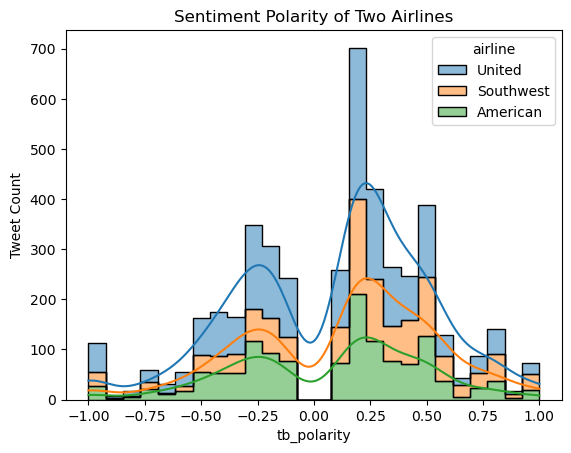

In [24]:
fig, ax = plt.subplots()
ax.legend().set_title("SOMETHING")

#sns.kdeplot(data=data, x="polarity", hue="airline", multiple="stack")

#sns.histplot(data=data, x="tb_polarity", hue="airline", multiple="stack", kde=True)
#sns.histplot(data=data, x="tb_polarity", hue="airline", multiple="stack", element='step', kde=True)
#sns.histplot(data=data, x="tb_polarity", hue="airline", multiple="stack", element='step', stat="density", common_norm=False, cumulative=True, kde=True)
sns.histplot(data=data, x="tb_polarity", hue="airline", multiple="stack", element='step', kde=True)
#sns.histplot(data=data, x="tb_polarity", hue="airline", multiple="stack", element='poly', kde=True)
#sns.histplot(data=data, x="tb_polarity", hue="airline", multiple="fill", kde=True)
#sns.histplot(data=data, x="tb_polarity", hue="airline", multiple="layer", kde=True)

#sns.histplot(data=data, x="tb_polarity", hue="airline", multiple="dodge", kde=True)


plt.title("Sentiment Polarity of Two Airlines")
plt.ylabel("Tweet Count")
plt.show()

### analysis 
- Accuracy 
    - NLTK 0.5399590163934426
    - Textblob 0.4507513661202186
- From above result we can say that NLTK as more accuracy score 